In [1]:
import torch
import transformers

import torchtrail

/Users/arakhmati/github/torchtrail/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


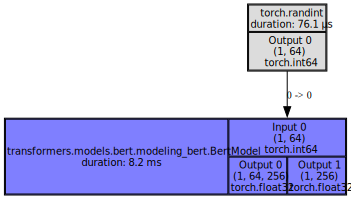

In [2]:
model_name = "google/bert_uncased_L-4_H-256_A-4"
config = transformers.BertConfig.from_pretrained(model_name)
config.num_hidden_layers = 1
model = transformers.BertModel.from_pretrained(model_name, config=config).eval()

with torchtrail.trace():
    input_tensor = torch.randint(0, model.config.vocab_size, (1, 64))
    output = model(input_tensor).last_hidden_state

torchtrail.visualize(output, max_depth=1)

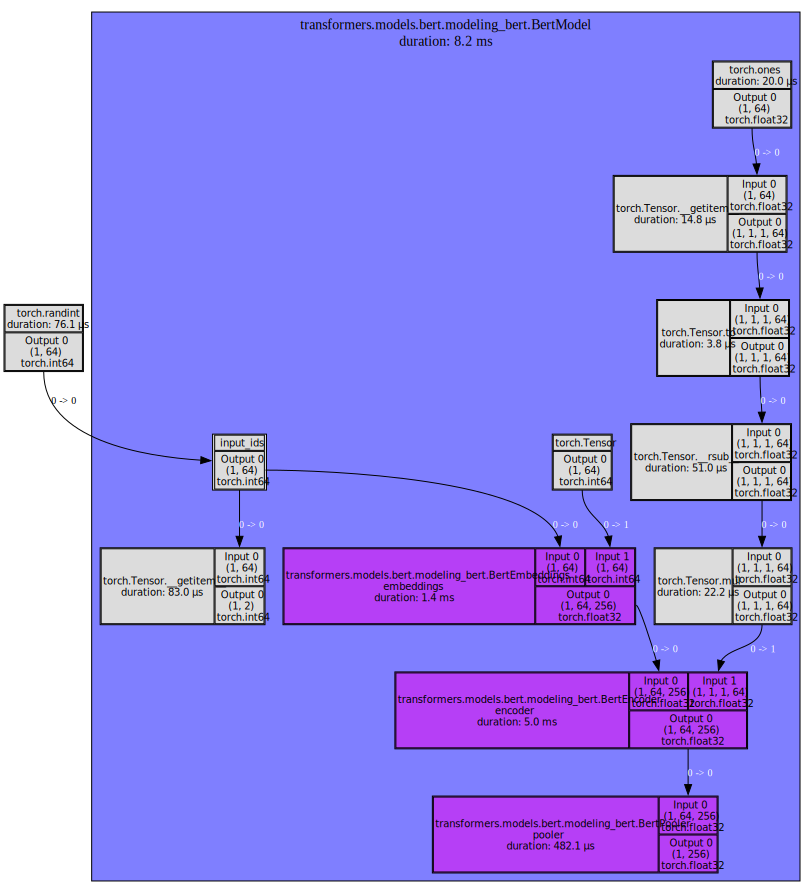

In [3]:
torchtrail.visualize(output, max_depth=2)

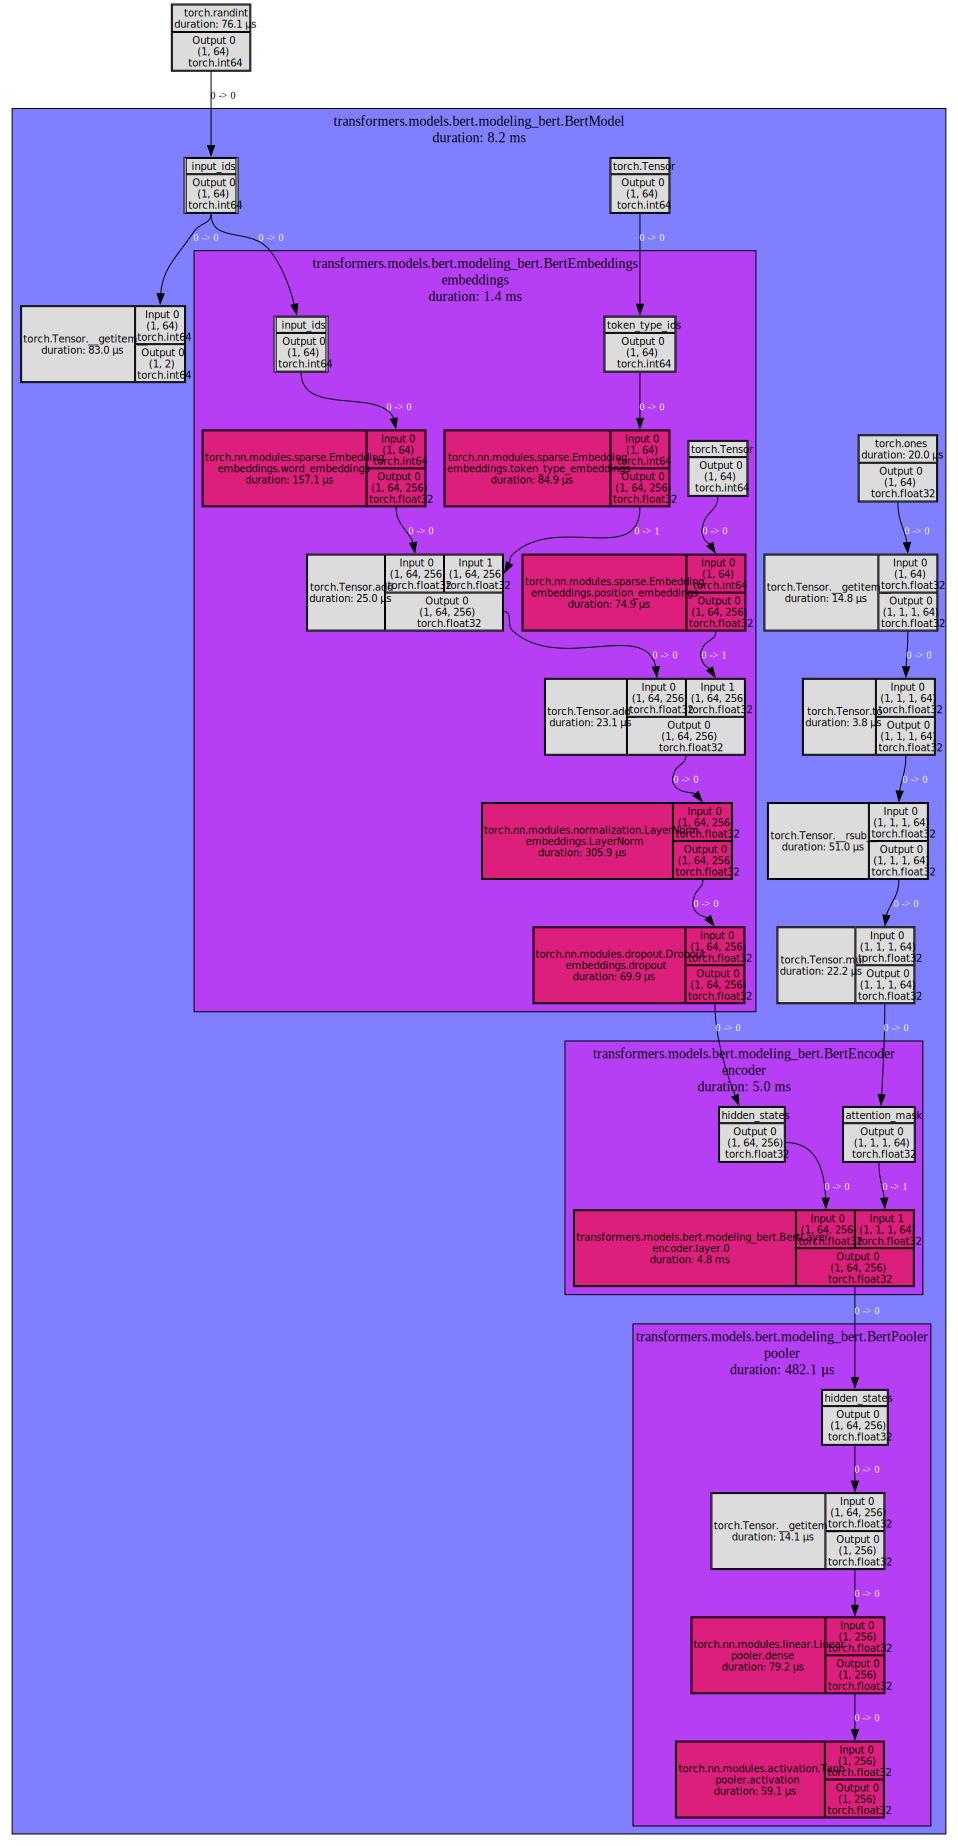

In [4]:
torchtrail.visualize(output, max_depth=3)

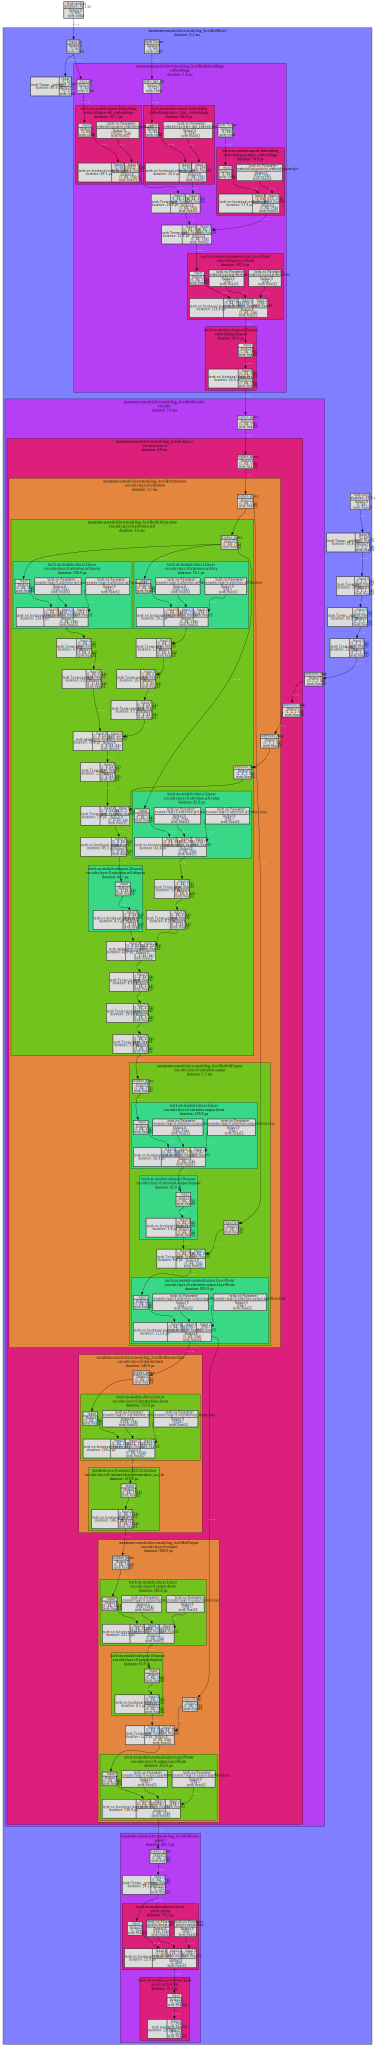

In [5]:
torchtrail.visualize(output)

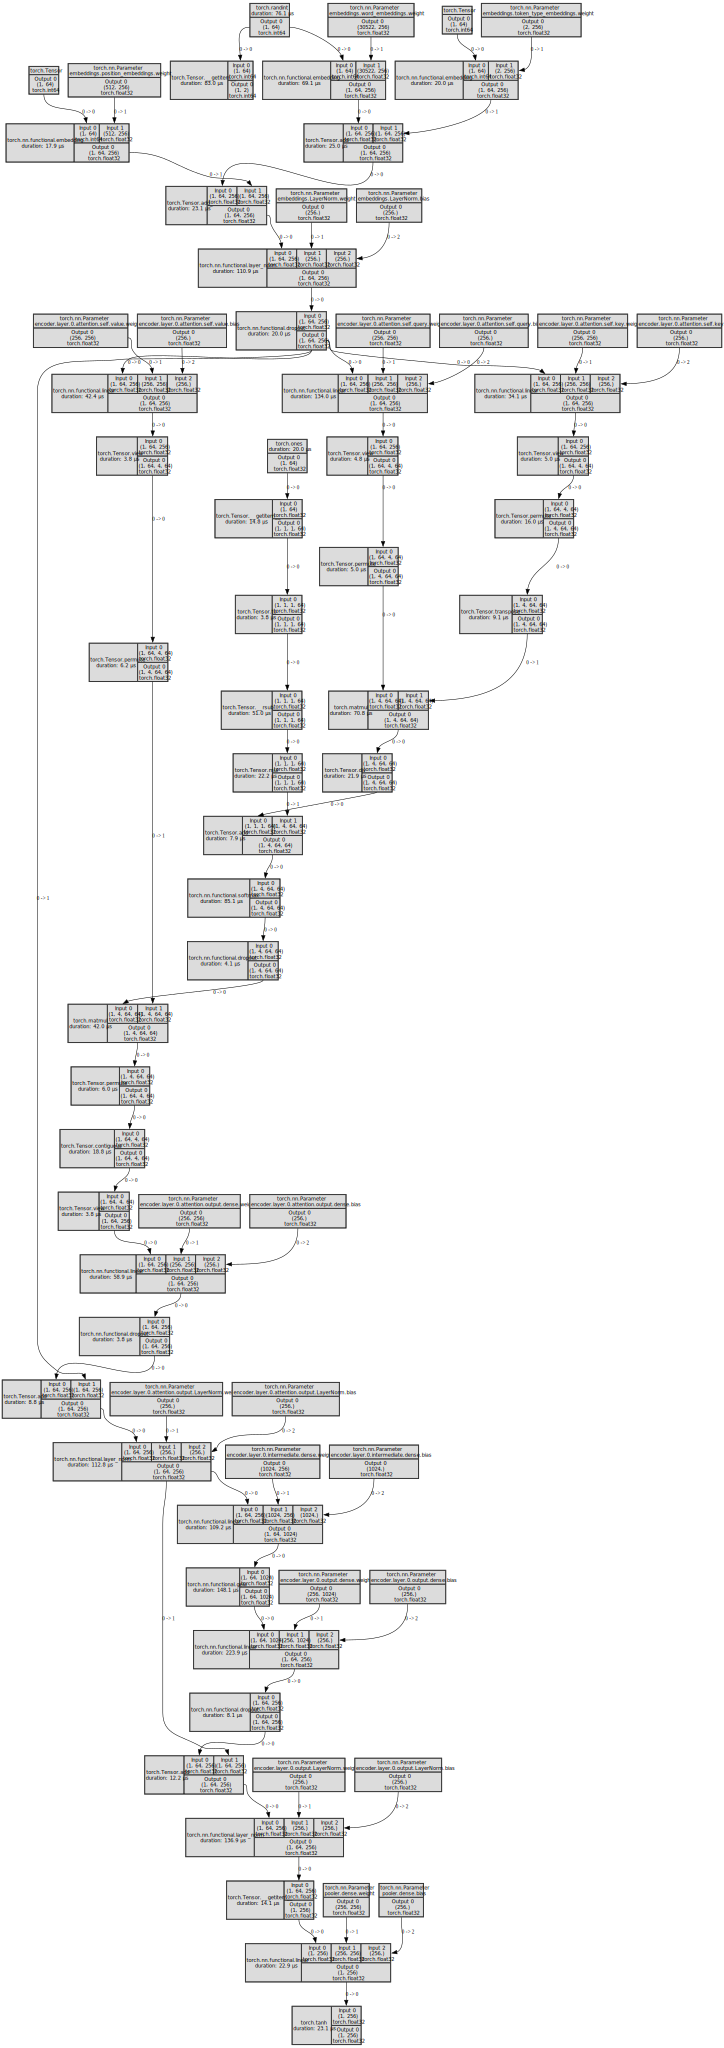

In [6]:
torchtrail.visualize(output, show_modules=False)

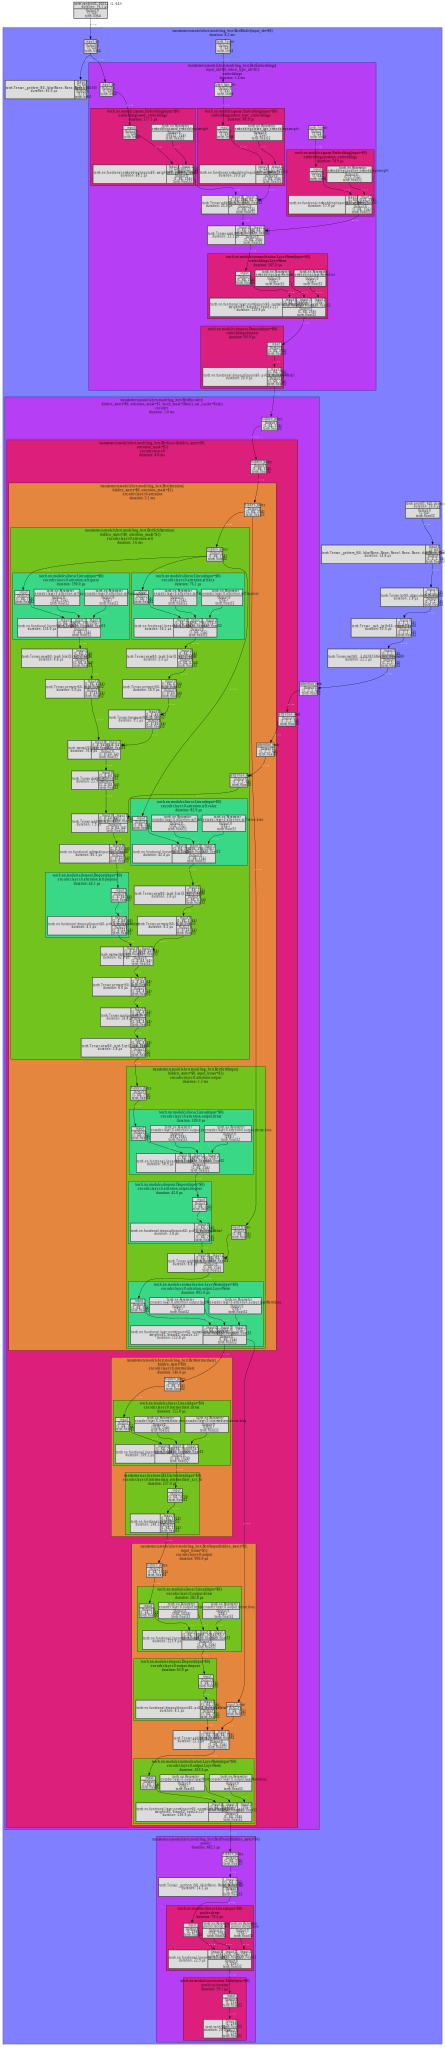

In [7]:
torchtrail.visualize(output, verbose=True)

In [8]:
print(torchtrail.codegen(output, top_level_name="bert"))

def Embedding_embeddings_word_embeddings(config, input, *, parameters):
    variable_0 = parameters.weight    # shapes: (30522, 256), dtypes: torch.float32
    variable_1 = torch.nn.functional.embedding(input=input, weight=variable_0, padding_idx=0)    # shapes: (1, 64, 256), dtypes: torch.float32; duration: 69.1 µs
    return variable_1

def Embedding_embeddings_token_type_embeddings(config, input, *, parameters):
    variable_0 = parameters.weight    # shapes: (2, 256), dtypes: torch.float32
    variable_1 = torch.nn.functional.embedding(input=input, weight=variable_0)    # shapes: (1, 64, 256), dtypes: torch.float32; duration: 20.0 µs
    return variable_1

def Embedding_embeddings_position_embeddings(config, input, *, parameters):
    variable_0 = parameters.weight    # shapes: (512, 256), dtypes: torch.float32
    variable_1 = torch.nn.functional.embedding(input=input, weight=variable_0)    # shapes: (1, 64, 256), dtypes: torch.float32; duration: 17.9 µs
    return variable_1

def